In [1]:
import tensorflow as tf
import numpy as np

In [34]:
from matplotlib import pyplot as plt
%matplotlib notebook
tf.__version__

'2.3.0'

In [20]:
TRUE_W = 3.0
TRUE_B = 2.0
NUM_EXAMPLES = 1000
x = tf.random.normal(shape=[NUM_EXAMPLES])

In [22]:
# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = x * TRUE_W + TRUE_B + noise

In [26]:
x == noise

<tf.Tensor: shape=(1000,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, Fa

<IPython.core.display.Javascript object>


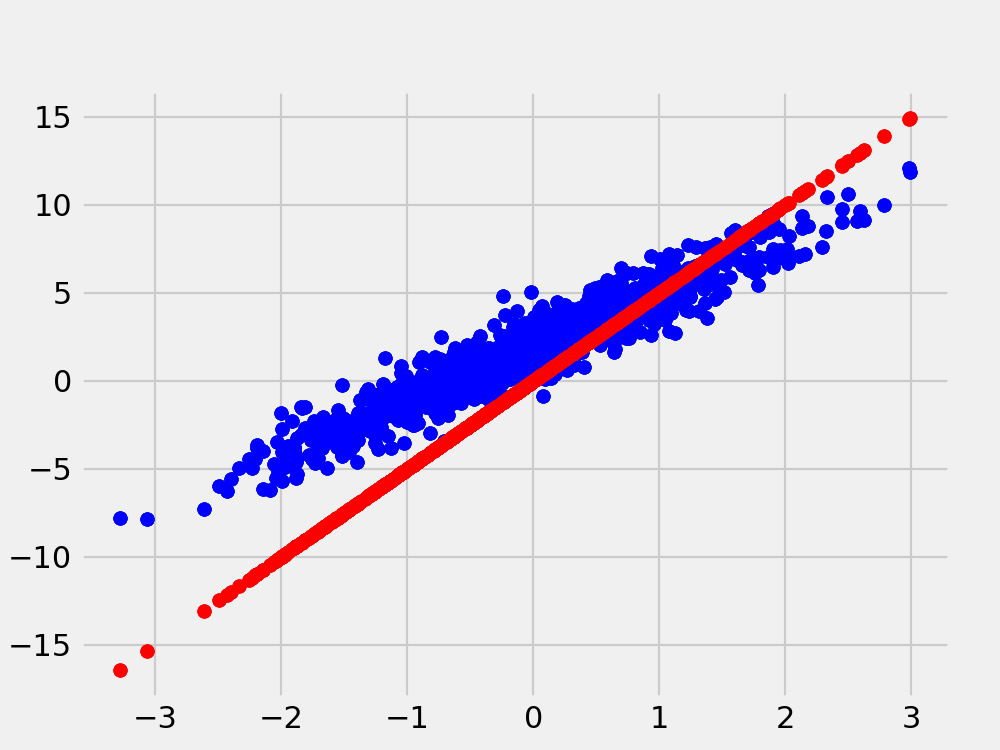

In [37]:
plt.style.use('fivethirtyeight')
plt.scatter(x, y)

In [46]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be randomly initialized
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.w * x + self.b

model = MyModel()

# List the variables tf.modules's built-in variable aggregation.
print("Variables:", model.variables)

# Verify the model works
assert model(3.0).numpy() == 15.0

print(type(model))

isinstance(model, MyModel)

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)
<class '__main__.MyModel'>


True

In [47]:
# This computes a single loss value for an entire batch
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

<IPython.core.display.Javascript object>


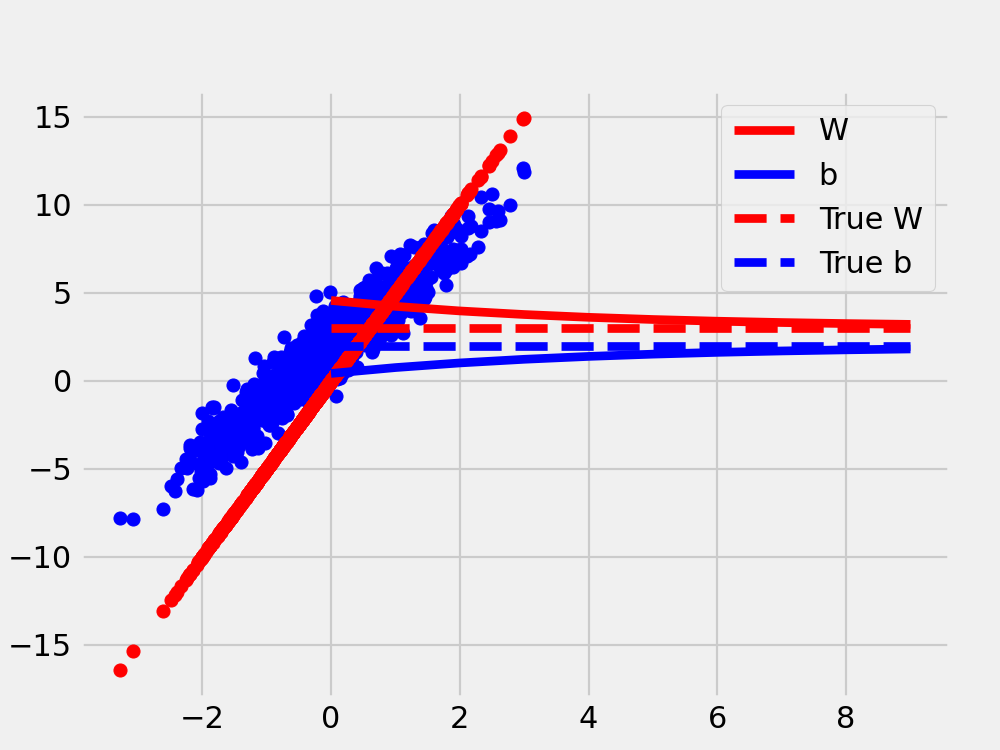

In [51]:
plt.figure()
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")

In [52]:
print("Current loss: %1.6f" % loss(model(x), y).numpy())

Current loss: 9.365018


In [62]:
# Given a callable model, inputs, outputs, and a learning rate...
def train(model, x, y, learning_rate):

    with tf.GradientTape() as t:
        # Trainable variables are automatically tracked by GradientTape
        current_loss = loss(y, model(x))

    # Use GradientTape to calculate the gradients with respect to W and b
    dw, db = t.gradient(current_loss, [model.w, model.b])

    # Subtract the gradient scaled by the learning rate
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

In [68]:
model = MyModel()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(30)

# Define a training loop
def training_loop(model, x, y):

    for epoch in epochs:
        # Update the model with the single giant batch
        train(model, x, y, learning_rate=0.1)

        # Track this before I update
        Ws.append(model.w.numpy())
        bs.append(model.b.numpy())
        current_loss = loss(y, model(x))
        
        if epoch % 5 == 0:
            print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f" %
                  (epoch, Ws[-1], bs[-1], current_loss))


Starting: W=5.00 b=0.00, loss=9.36502
Epoch  0: W=4.57 b=0.42, loss=6.12803
Epoch  5: W=3.49 b=1.52, loss=1.40714
Epoch 10: W=3.18 b=1.85, loss=0.99012
Epoch 15: W=3.09 b=1.96, loss=0.95317
Epoch 20: W=3.06 b=1.99, loss=0.94989
Epoch 25: W=3.05 b=2.00, loss=0.94959


<IPython.core.display.Javascript object>


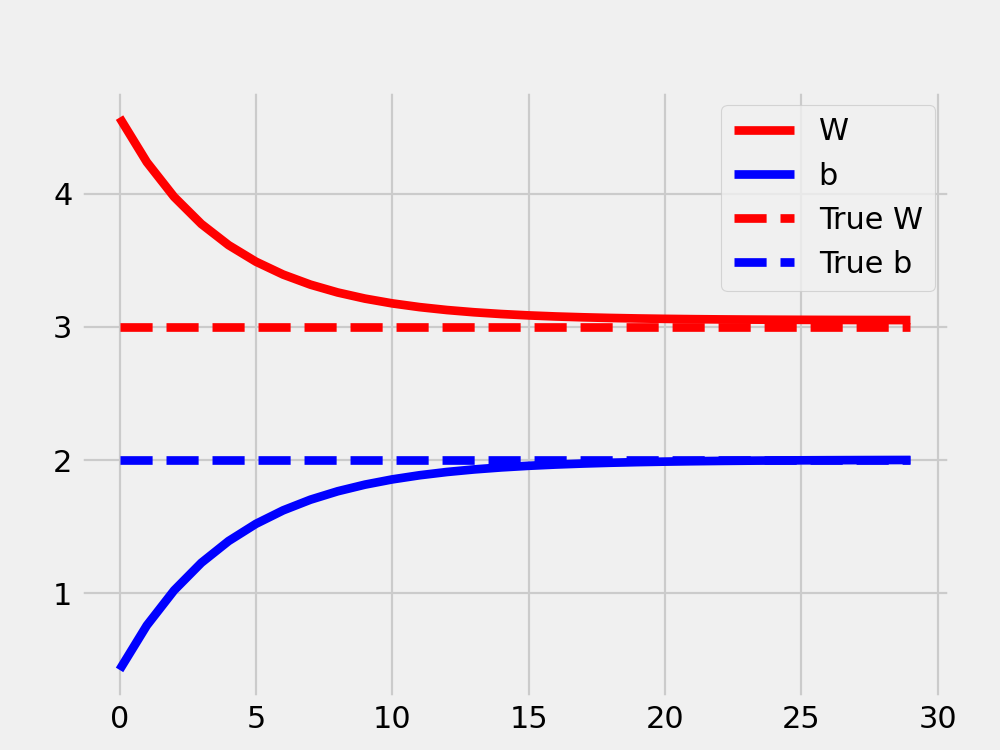

In [69]:
print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))

# Do the training
training_loop(model, x, y)

# Plot it
plt.figure()
plt.plot(epochs, Ws, "r",
         epochs, bs, "b")

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])

<IPython.core.display.Javascript object>


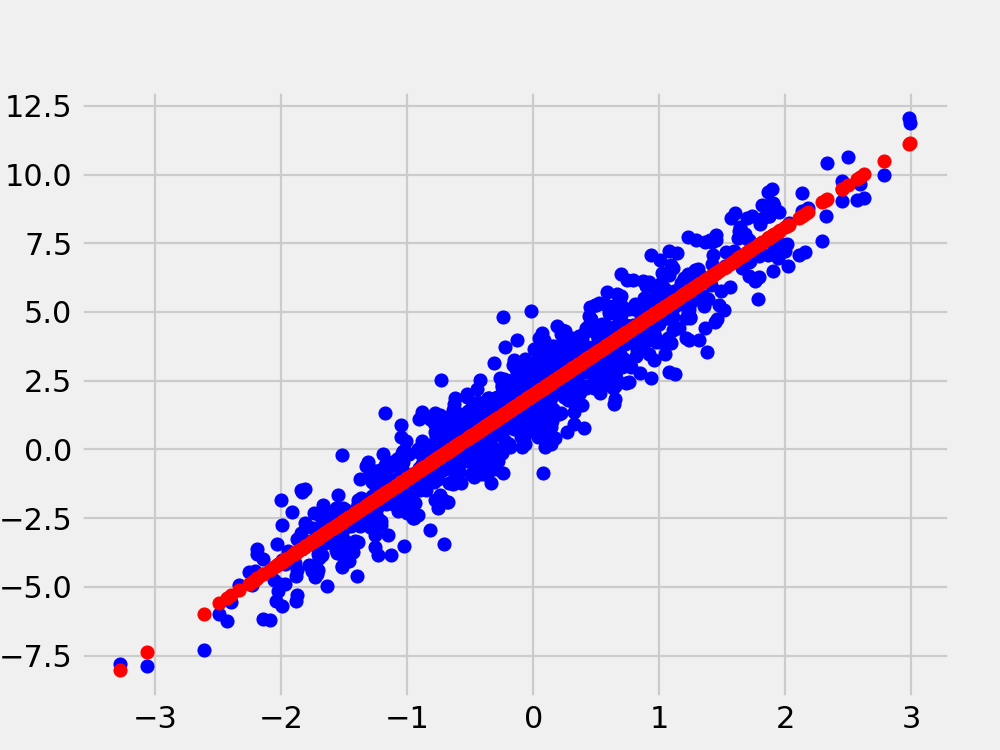

Current loss: 0.949567


In [70]:
# Visualize how the trained model performs
plt.figure()
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())